In [3]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [4]:
houseData = pd.read_csv('train.csv')
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
houseGrLivArea = pd.DataFrame(houseData['GrLivArea'])
houseSalePrice = pd.DataFrame(houseData['SalePrice'])

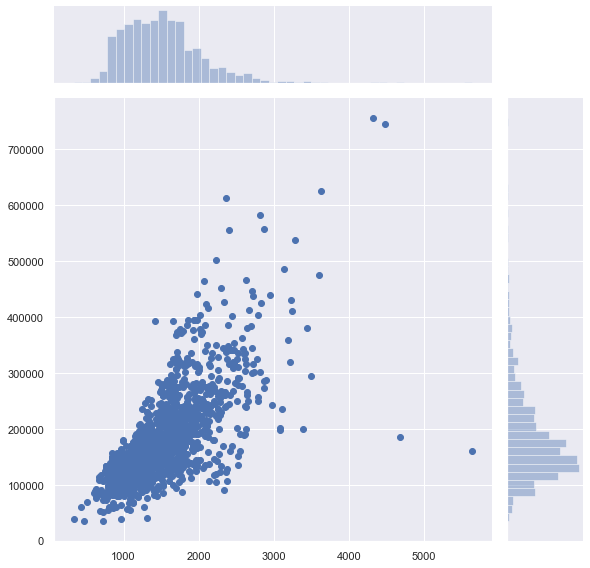

In [6]:
sb.jointplot(houseGrLivArea,houseSalePrice, height = 8)

,SalePrice,GrLivArea
SalePrice,1.000000,0.708624
GrLivArea,0.708624,1.000000


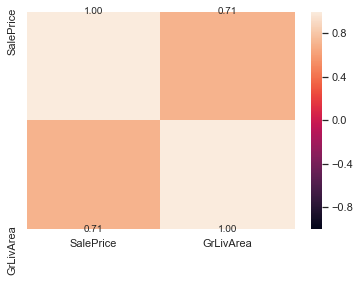

In [7]:
jointDF1 = pd.concat([houseData['SalePrice'], houseData['GrLivArea'].reindex(index= houseData['SalePrice'].index)], sort = False, axis = 1)
sb.heatmap(jointDF1.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")
jointDF1.corr()

In [8]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

c) Partition both datasets houseGrLivArea and houseSalePrice into Train (1100 rows) and Test (360 rows) sets.

Train datasets : houseGrLivArea_train and houseSalePrice_train (check both have 1100 rows)

Test datasets : houseGrLivArea_test and houseSalePrice_test (check both have 360 rows)

In [9]:
houseGrLivArea.info()
print("\n")
houseSalePrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 1 columns):
GrLivArea    1460 non-null int64
dtypes: int64(1)
memory usage: 11.5 KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 1 columns):
SalePrice    1460 non-null int64
dtypes: int64(1)
memory usage: 11.5 KB


In [10]:
# Train Set : 1100 samples
houseGrLivArea_train = pd.DataFrame(houseGrLivArea[:1100])
houseSalePrice_train = pd.DataFrame(houseSalePrice[:1100])

# Test Set : 360 samples
houseGrLivArea_test = pd.DataFrame(houseGrLivArea[-360:])
houseSalePrice_test = pd.DataFrame(houseSalePrice[-360:])

# Check the sample sizes
print("houseGrLivArea Set :", houseGrLivArea_train.shape, houseGrLivArea_test.shape)
print("houseSalePrice Set  :", houseSalePrice_train.shape, houseSalePrice_test.shape)

houseGrLivArea Set : (1100, 1) (360, 1)
houseSalePrice Set  : (1100, 1) (360, 1)


Training : Fit a Linear Regression model with X = houseGrLivArea_train and y = houseSalePrice_train

In [11]:
# Train the Linear Regression model
linreg.fit(houseGrLivArea_train,houseSalePrice_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Print the coefficients of the Linear Regression model you just fit, and plot the Regression line on a Scatterplot
of houseGrLivArea_train and houseSalePrice_train using the standard slope-intercept form of straight line. 

In [12]:
# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [9498.33463562]
Coefficients 	: a =  [[113.88950443]]


SalesPrice = a(houseGrLivArea) + b

Predict SalePrice for the test dataset houseGrLivArea_test using the Linear Regression model, and plot the
predictions on the Scatterplot of houseGrLivArea_test and houseSalePrice_test to visualize the accuracy.

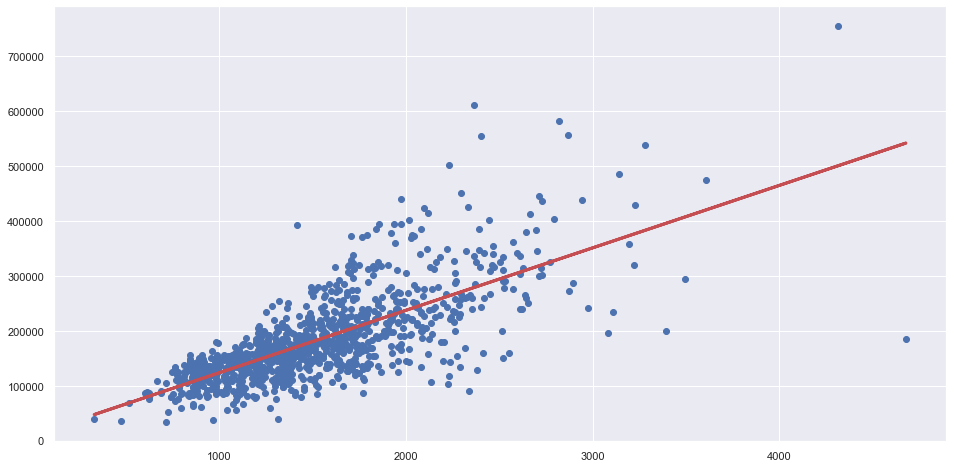

In [13]:
# Formula for the Regression line
regline_x = houseGrLivArea_train
regline_y = linreg.intercept_ + linreg.coef_ * houseGrLivArea_train

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(houseGrLivArea_train, houseSalePrice_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

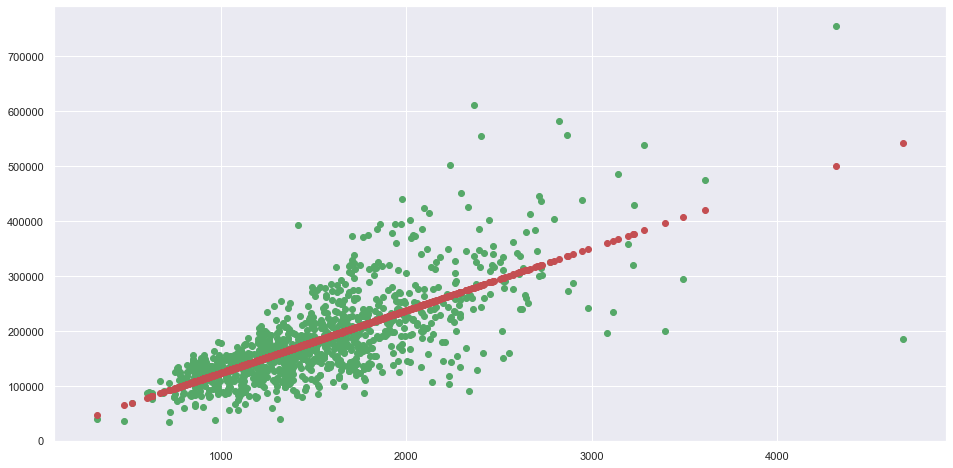

In [14]:
# Predict Total values corresponding to HP Train
total_train_pred = linreg.predict(houseGrLivArea_train)

# Plot the Linear Regression line
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(houseGrLivArea_train, houseSalePrice_train, color ='g')
plt.scatter(houseGrLivArea_train, total_train_pred, color = "r")
plt.show()

Predict SalePrice for the test dataset houseGrLivArea_test using the Linear Regression model, and plot the
predictions on the Scatterplot of houseGrLivArea_test and houseSalePrice_test to visualize the accuracy

In [16]:
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(houseGrLivArea_train, houseSalePrice_train))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(houseGrLivArea_train, houseSalePrice_train)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.5076645531847239
Mean Squared Error (MSE) 	: 38577414632.69909
Root Mean Squared Error (RMSE) 	: 196411.3403872065


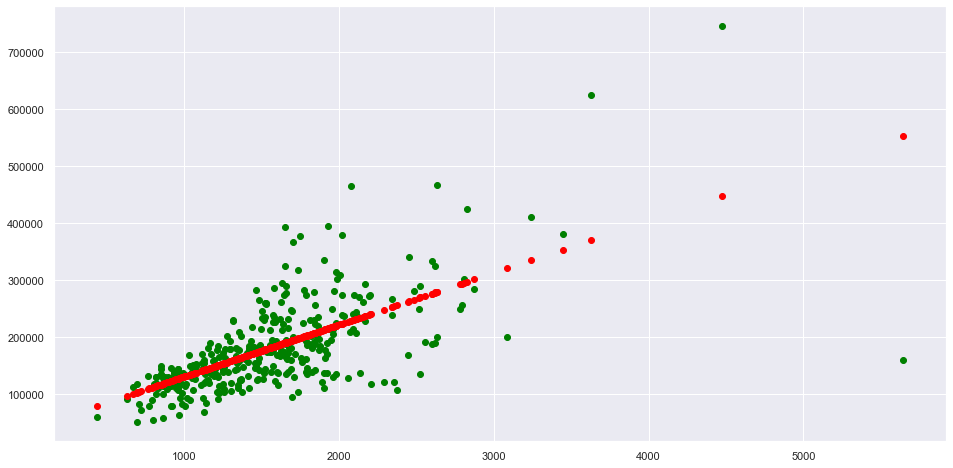

In [18]:
# Predict Total values corresponding to HP Test
total_test_pred = linreg.predict(houseGrLivArea_test)

# Plot the Predictions
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(houseGrLivArea_test, houseSalePrice_test, color = "green")
plt.scatter(houseGrLivArea_test,total_test_pred, color = "red")
plt.show()


In [17]:
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(houseGrLivArea_test, houseSalePrice_test))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(houseGrLivArea_test, houseSalePrice_test)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.43215608495867097
Mean Squared Error (MSE) 	: 37997240749.422226
Root Mean Squared Error (RMSE) 	: 194928.80943929817


Intercept of Regression 	: b =  [16732.49941863]
Coefficients of Regression 	: a =  [[109.38799419]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5060877215541366
Mean Squared Error (MSE) 	: 3404791278.769358

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.4754443293707594
Mean Squared Error (MSE) 	: 2346169967.084095



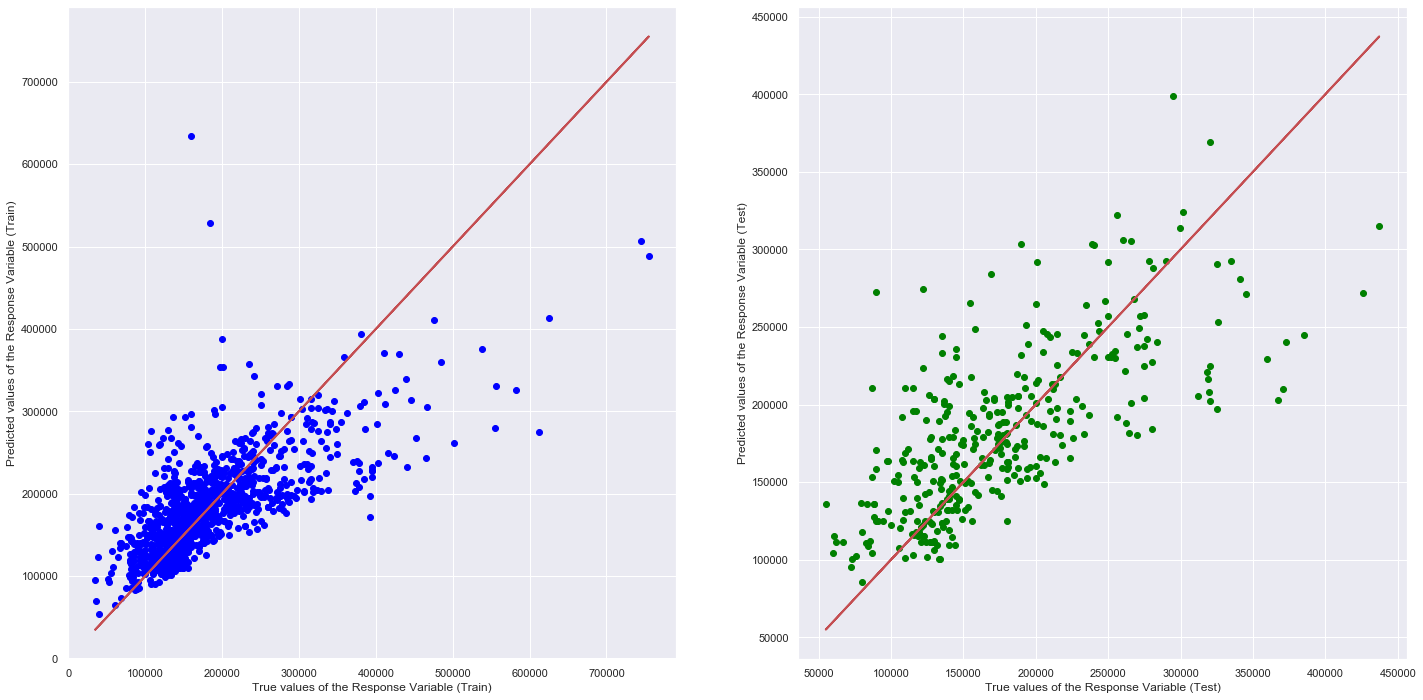

In [44]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(houseGrLivArea,houseSalePrice, test_size = 360)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 2)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 2)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

Intercept of Regression 	: b =  [158672.34105058]
Coefficients of Regression 	: a =  [[2.47858819]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.08416040341659337
Mean Squared Error (MSE) 	: 6020134688.736562

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.04186878895749113
Mean Squared Error (MSE) 	: 5519137213.235948



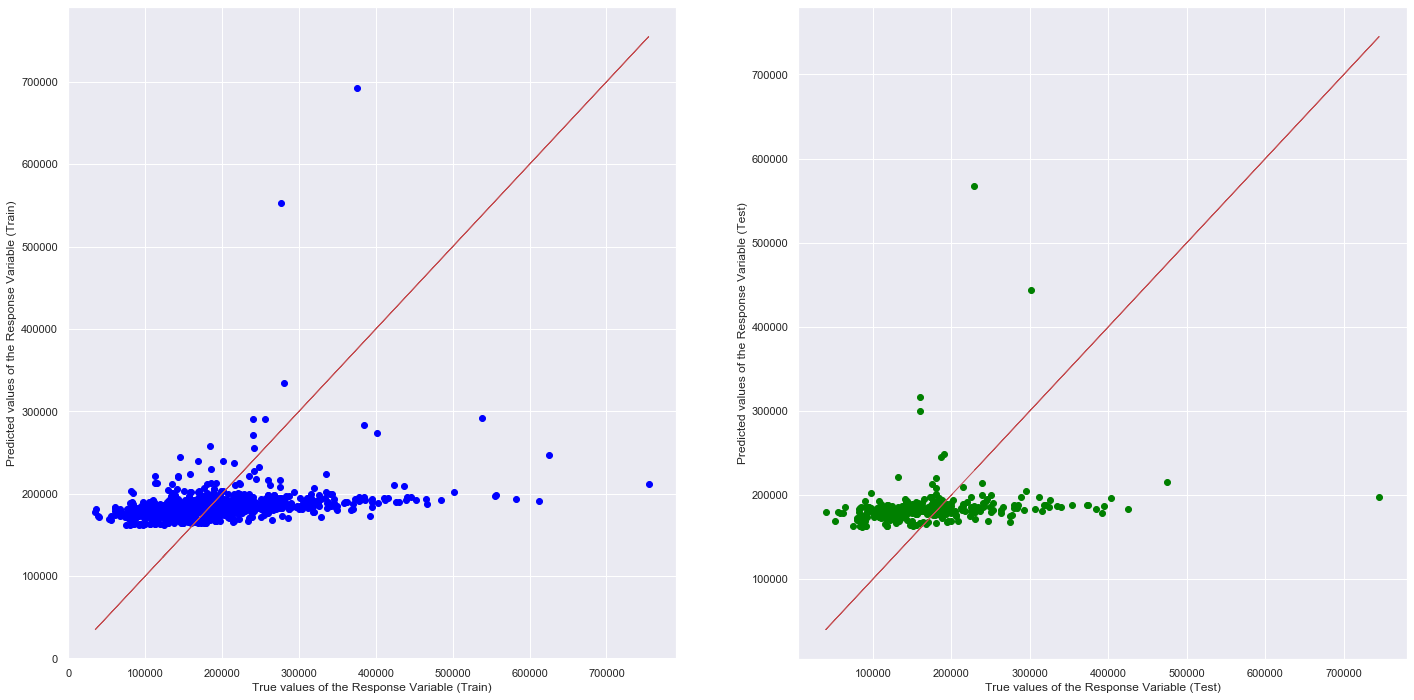

In [45]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


LotArea = pd.DataFrame(houseData['LotArea'])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(LotArea,houseSalePrice, test_size = 360)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

Intercept of Regression 	: b =  [162375.58804442]
Coefficients of Regression 	: a =  [[1.87705703]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.06639219370133975
Mean Squared Error (MSE) 	: 6094592420.132929

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.07034834947777435
Mean Squared Error (MSE) 	: 5200484477.810119



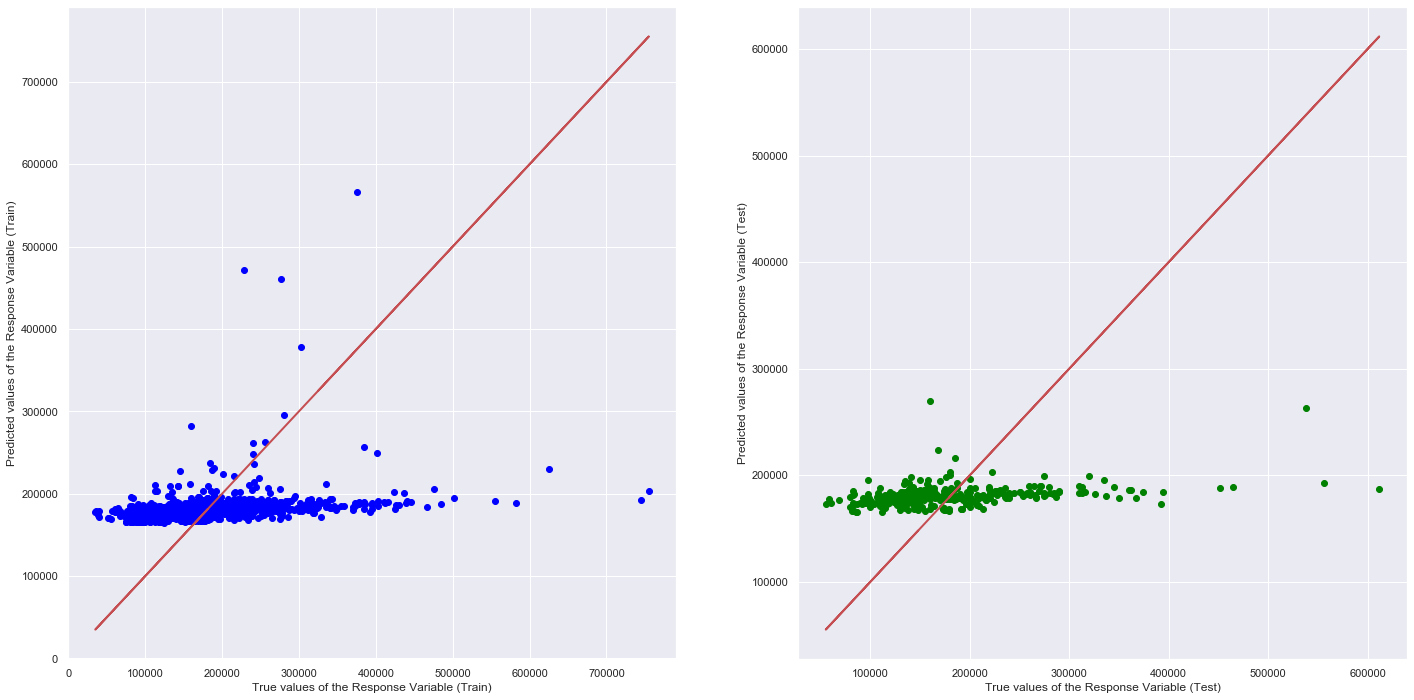

In [42]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


TotalBsmtSF = pd.DataFrame(houseData['TotalBsmtSF'])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(LotArea,houseSalePrice, test_size = 360)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 2)

axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 2)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

Intercept of Regression 	: b =  [160652.44876977]
Coefficients of Regression 	: a =  [[1.78584131]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.06342993781304684
Mean Squared Error (MSE) 	: 5768016334.124507

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.07609142099560806
Mean Squared Error (MSE) 	: 6221314554.0446615



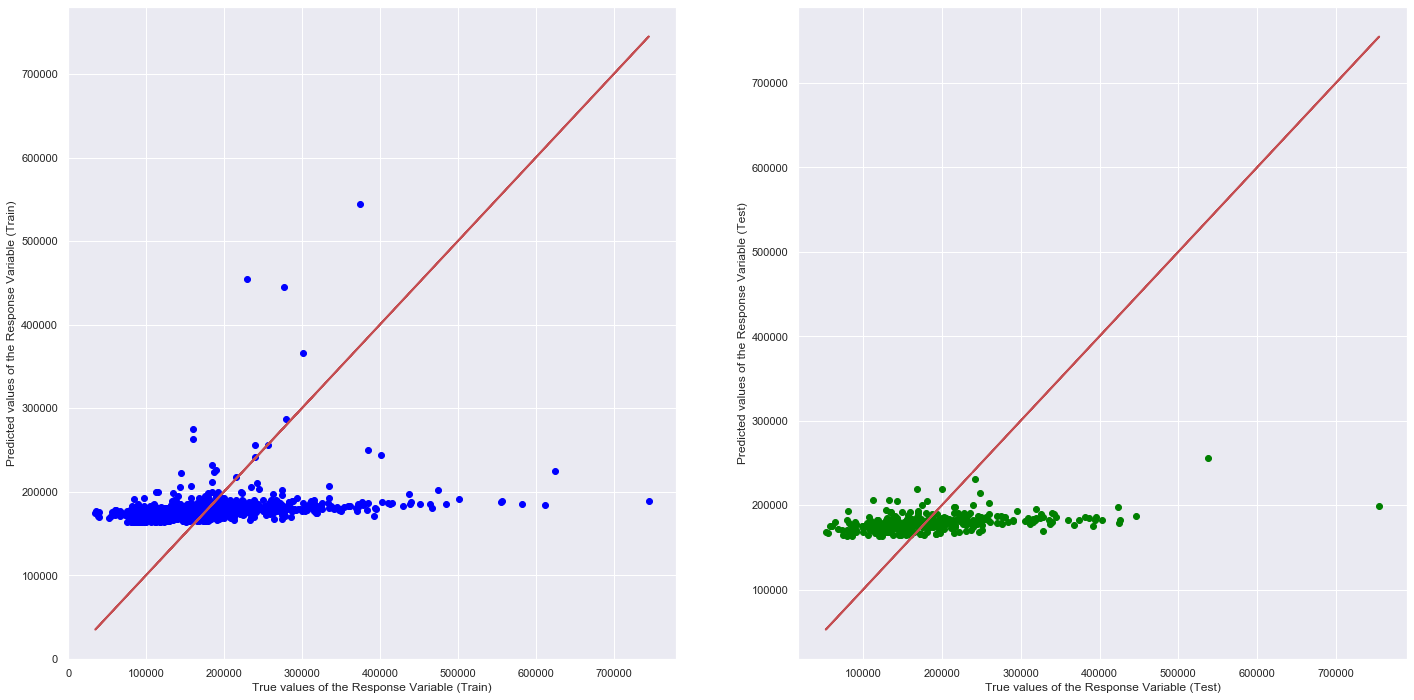

In [43]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


GarageArea = pd.DataFrame(houseData['GarageArea'])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(LotArea,houseSalePrice, test_size = 360)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 2)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 2)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [49]:
# Extract Response and Predictors
y = pd.DataFrame(houseData["SalePrice"])
X = pd.DataFrame(houseData[["LotArea", "GrLivArea", "GarageArea", "TotalBsmtSF"]])

# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 360)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (1100, 1) (1100, 4)
Test Set  : (360, 1) (360, 4)


In [51]:
# Summary Statistics for Response
y_train.describe()
# Summary Statistics for Predictors
X_train.describe()

,LotArea,GrLivArea,GarageArea,TotalBsmtSF
count,1100.000000,1100.000000,1100.00000,1100.000000
mean,10521.518182,1511.634545,474.17000,1050.657273
std,10103.811307,531.576476,218.72425,453.010928
min,1300.000000,334.000000,0.00000,0.000000
25%,7500.000000,1121.750000,329.50000,791.750000
50%,9410.500000,1457.000000,479.00000,990.000000
75%,11657.250000,1768.000000,576.00000,1265.000000
max,215245.000000,5642.000000,1418.00000,6110.000000


In [52]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression


# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])

Intercept of Regression 	: b =  [-18348.5448122]
Coefficients of Regression 	: a =  [[ 0.17711274 68.07267667 98.00412606 46.57908439]]



,Predictors,Coefficients
0,LotArea,0.177113
1,GrLivArea,68.072677
2,GarageArea,98.004126
3,TotalBsmtSF,46.579084


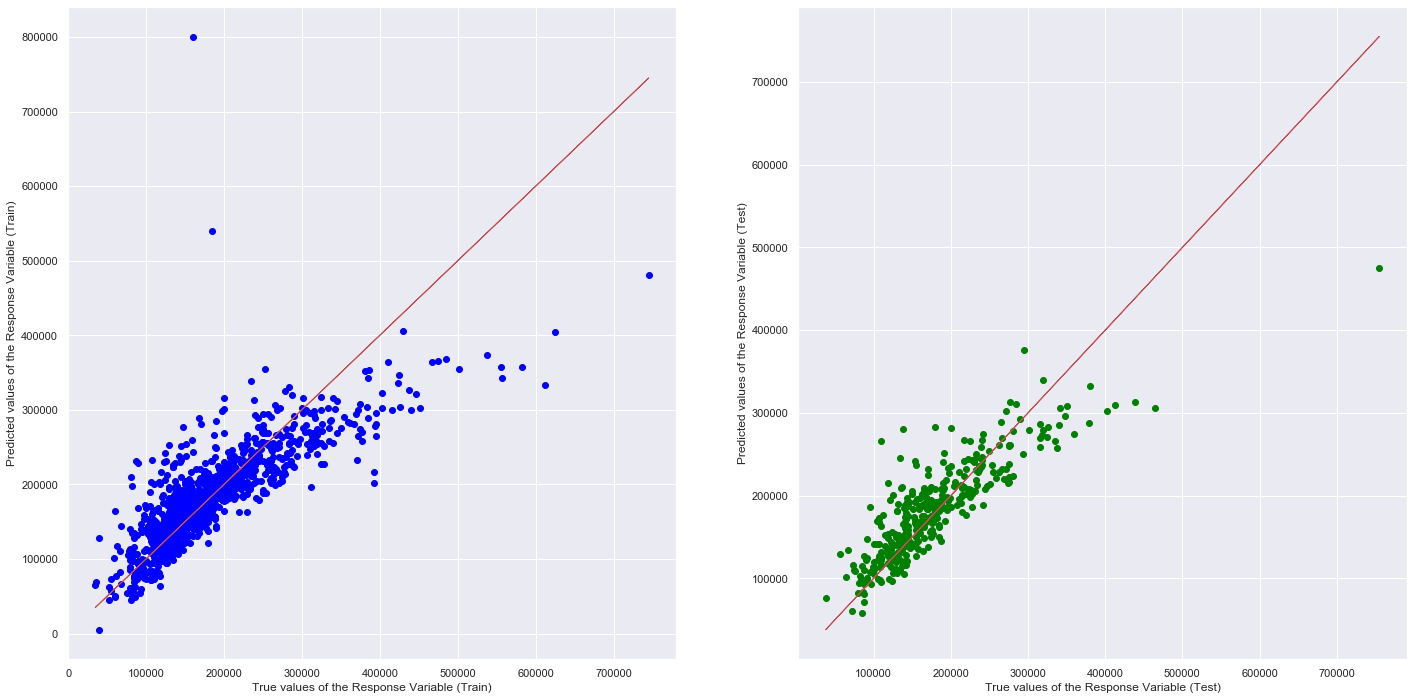

In [54]:
# Predict the Total values from Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()